In [1]:
# Importing Essential Packages and Loading the data set into a data frame.

import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel('DataSetPredictions.xlsx', sheet_name='Sheet2')
df.head()

,Average_Rating,Comment,Classification
0,0.30,"The service was terrible & they didn,t get the...",Bad Review
1,0.20,Service was about as bad as it can get. My fam...,Bad Review
2,0.00,Tried to eat here for breakfast but their one ...,Bad Review
3,0.20,We did the ride and dine and the food was ter...,Bad Review
4,0.15,Not a pleasant experience.,Bad Review


In [2]:
# Create a list to capture Polarity of the the comments
Polarity = []
# Import TextBolb Module for Sentiment Anslysis
from textblob import TextBlob
# Loop through the comments to derive Polarity and append to list
for i in range(len(df.Comment)):
     Polarity.append(TextBlob(df.Comment[i]).sentiment.polarity)
# Add the new column of polarity to the Data Frame
df['Polarity'] = Polarity
df.head()

,Average_Rating,Comment,Classification,Polarity
0,0.30,"The service was terrible & they didn,t get the...",Bad Review,-1.000000
1,0.20,Service was about as bad as it can get. My fam...,Bad Review,-0.700000
2,0.00,Tried to eat here for breakfast but their one ...,Bad Review,-0.200000
3,0.20,We did the ride and dine and the food was ter...,Bad Review,-0.555556
4,0.15,Not a pleasant experience.,Bad Review,-0.366667


In [3]:
df['Normal Polarity'] = (df.Polarity+1)/2
df.head()

,Average_Rating,Comment,Classification,Polarity,Normal Polarity
0,0.30,"The service was terrible & they didn,t get the...",Bad Review,-1.000000,0.000000
1,0.20,Service was about as bad as it can get. My fam...,Bad Review,-0.700000,0.150000
2,0.00,Tried to eat here for breakfast but their one ...,Bad Review,-0.200000,0.400000
3,0.20,We did the ride and dine and the food was ter...,Bad Review,-0.555556,0.222222
4,0.15,Not a pleasant experience.,Bad Review,-0.366667,0.316667


In [4]:
# Encoding the Lables
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Classification']= label_encoder.fit_transform(df['Classification']) 
df.head()

,Average_Rating,Comment,Classification,Polarity,Normal Polarity
0,0.30,"The service was terrible & they didn,t get the...",0,-1.000000,0.000000
1,0.20,Service was about as bad as it can get. My fam...,0,-0.700000,0.150000
2,0.00,Tried to eat here for breakfast but their one ...,0,-0.200000,0.400000
3,0.20,We did the ride and dine and the food was ter...,0,-0.555556,0.222222
4,0.15,Not a pleasant experience.,0,-0.366667,0.316667


In [5]:
#Get a count of classification
df.Classification.value_counts()

0    115
1    101
2      6
Name: Classification, dtype: int64

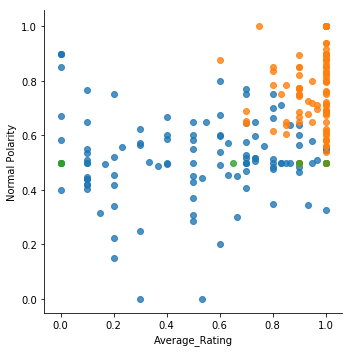

In [20]:
# library & dataset
import seaborn as sns
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Average_Rating", y="Normal Polarity", data=df, fit_reg=False, hue='Classification', legend=False)

In [7]:
# Extracting X and Y which are Input and Target variables for Random Forest
# Target Variables
Y = df['Classification']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int64

In [8]:
X = df[['Average_Rating','Normal Polarity','Comment']]
X.head()

,Average_Rating,Normal Polarity,Comment
0,0.30,0.000000,"The service was terrible & they didn,t get the..."
1,0.20,0.150000,Service was about as bad as it can get. My fam...
2,0.00,0.400000,Tried to eat here for breakfast but their one ...
3,0.20,0.222222,We did the ride and dine and the food was ter...
4,0.15,0.316667,Not a pleasant experience.


In [9]:
# Splitting Data into Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.0)

In [10]:
# Implementing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
# random forest model creation
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
clf.fit(X_train[['Average_Rating','Normal Polarity']],y_train)

C:\Users\macharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [12]:
clf_predict = clf.predict(X_train[['Average_Rating','Normal Polarity']])

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, clf_predict)

0.9009009009009009

In [14]:
def perdictclassification(rating,comment):
    Plo = TextBlob(comment).sentiment.polarity
    Z = pd.Series([rating,Plo])
    Prediction = clf.predict(pd.DataFrame(np.array([[rating,Plo]]),columns=['Average_Rating','Normal Polarity']))
    return Prediction
Prediction = perdictclassification(0.3,'Not enough healthy options on the menu or for purchase')
Prediction
label_encoder.inverse_transform(Prediction)

array(['Bad Review'], dtype=object)

In [15]:
output = pd.DataFrame(list(zip(X_train.Comment.values.tolist(), y_train.values.tolist(),clf_predict)), 
               columns =['Comments', 'Target','Predictions']) 
output.head()

,Comments,Target,Predictions
0,My kids and I all absolutely loved it!,1,1
1,Really had a great time!,1,1
2,Room was not clean. Hair abs dirt on the floor...,0,0
3,There was only one server for the entire dinin...,0,0
4,Not a pleasant experience.,0,0


In [40]:
# random forest model creation with only Polarity
from statistics import mean 
for i in range(100):
    val = []
    clf2 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=i)
    clf2.fit(X_train[['Normal Polarity']],y_train)
    clf2_predict = clf2.predict(X_train[['Normal Polarity']])
    from sklearn.metrics import accuracy_score
    val.append(accuracy_score(y_train, clf2_predict))
print(mean(val))

0.7882882882882883


In [41]:
# random forest model creation with only Rating
from statistics import mean 
for i in range(100):
    val = []
    clf2 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=i)
    clf2.fit(X_train[['Average_Rating']],y_train)
    clf2_predict = clf2.predict(X_train[['Average_Rating']])
    from sklearn.metrics import accuracy_score
    val.append(accuracy_score(y_train, clf2_predict))
print(mean(val))    

0.8378378378378378


In [42]:
# random forest model creation with Rating and Polarity
from statistics import mean 
for i in range(100):
    val = []
    clf2 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
    clf2.fit(X_train[['Average_Rating','Normal Polarity']],y_train)
    clf2_predict = clf2.predict(X_train[['Average_Rating','Normal Polarity']])
    from sklearn.metrics import accuracy_score
    val.append(accuracy_score(y_train, clf2_predict))
print(mean(val))   

0.9009009009009009
